K-Means clustering is unsupervised machine learning alogrithm, it is used to find patterns in unlabel data by making groups(clusters) of similar datapoints

<b>Algorithm Working</b>
    1. Choose k random points as cluster centers called centriods
    2. Assign each clusters a k random point by calculating its distance from centroid
    3. Find new cluster center by taking the average of the assigned points.
    4. Repeat Step 2 and Step 3 until none of the clusters assignments changes

## Use Cases 

K-Means is widely used for many applications

    1. Image Segmentation
    2. Clustring Gene Segmentation Data
    3. News Article Clustering
    4. Clustering Languages
    5. Species Clustering
    6. Anomaly Detection

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

%matplotlib inline

In [28]:
data = pd.read_csv('xclara.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      3000 non-null   float64
 1   V2      3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [29]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


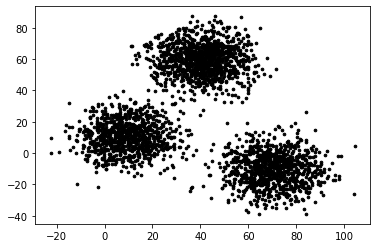

In [30]:
v1 = data['V1'].values
v2 = data['V2'].values
X = np.array(list(zip(v1, v2)))

plt.scatter(v1, v2, c='black', s=7)

In [31]:
#Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [42]:
# Number of clusters
k =3

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X) - 20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X) - 20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[10. 59.]
 [58. 39.]
 [80. 71.]]


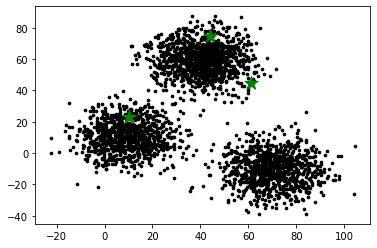

In [33]:
# Plotting along with the Centroids
plt.scatter(v1, v2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [40]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances  = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values    
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    error = dist(C, C_old, None)

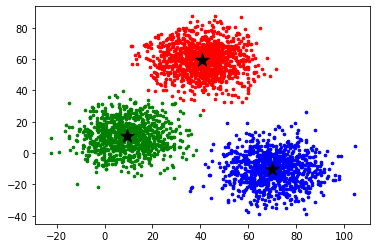

In [41]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Scikit learn approach

### Example 1

In [53]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [54]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[10. 59.]
 [58. 39.]
 [80. 71.]]
[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


### Example 3

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

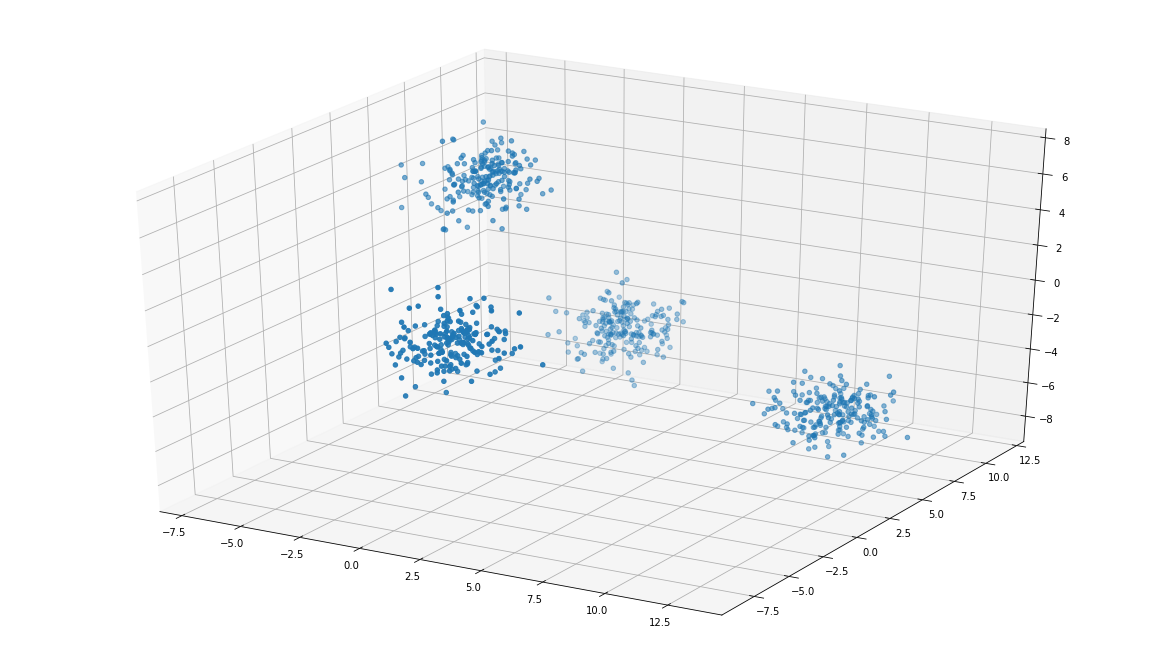

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [57]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

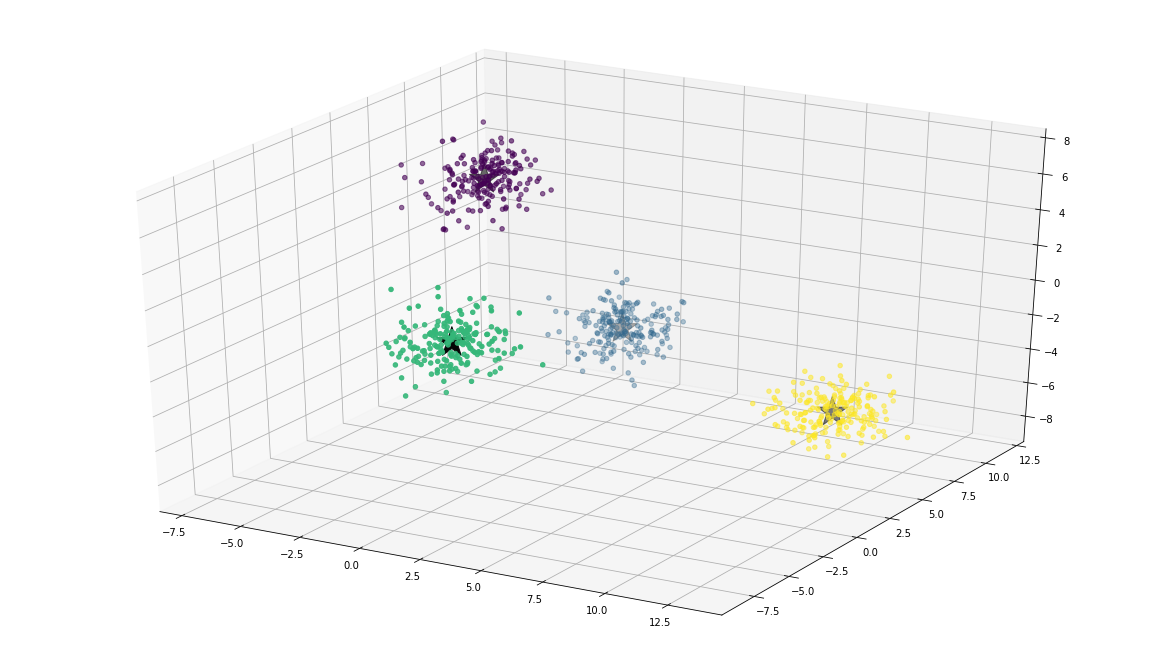

In [58]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)